In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.feature_extraction import _stop_words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

import nltk
import re

<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
Scope: Este dato se extrae de Elkins, Ginsburg y Melton, The Endurance of National Constitutions (Cambridge University Press, 2009). Mide el porcentaje de 701 temas principales de la encuesta del PCCh incluidos en una constitución dada.

Length (en palabras): Este es simplemente un informe del número total de palabras de la Constitución, medido por Microsoft Word.

Executive Power: Este es un índice aditivo extraído del documento de trabajo "Restricciones Constitucionales a la Legislación Ejecutiva". El índice oscila entre 0 y 7 y refleja la presencia o ausencia de siete aspectos importantes de la legislación ejecutiva:

(1) la facultad de iniciar leyes;

(2) la facultad de emitir decretos;

(3) la facultad de iniciar reformas constitucionales;

(4) la facultad de declarar estados de emergencia;

(5) el poder de veto;

(6) la facultad de impugnar la constitucionalidad de la legislación;

(7) la facultad de disolver la legislatura.

El puntaje del índice indica el número total de estos poderes otorgados a cualquier ejecutivo nacional (presidente, primer ministro o asignado al gobierno) en su conjunto.

Legislative Power: Captura el grado formal de poder que la Constitución asigna a la legislatura. El indicador se extrae de Elkins, Ginsburg y Melton, The Endurance of National Constitutions (Cambridge University Press, 2009), donde creamos un conjunto de variables binarias del PCC para que coincidan con la encuesta de 32 ítems desarrollada por M. Steven Fish y Mathew Kroenig en The Handbook of National Legislatures: A Global Survey (Cambridge University Press, 2009). La puntuación del índice es simplemente la media de los 32 elementos binarios, donde los números más altos indican mayor poder legislativo y los números más bajos, menor.

Judicial Independence: Este índice se extrae del artículo de Ginsburg y Melton, "¿Importa realmente la independencia judicial de jure? Una reevaluación de las explicaciones sobre la independencia judicial". Se trata de un índice aditivo que va de 0 a 6 y que captura la presencia o ausencia constitucional de seis características que se cree que mejoran la independencia judicial.
Estas seis características son:
(1) si la constitución contiene una declaración explícita de independencia judicial;
(2) si la constitución establece que los jueces tienen nombramientos vitalicios;
(3) si los nombramientos para el máximo tribunal implican a un consejo judicial o a dos (o más) actores;
(4) si la destitución está prohibida o limitada de modo que requiere la propuesta de una mayoría cualificada en la legislatura, o si solo el público o el consejo judicial pueden proponer la destitución y se requiere la aprobación de otro actor político;
(5) si la destitución se limita explícitamente a delitos y otras cuestiones de mala conducta, traición o violaciones de la constitución; y
(6) si los salarios judiciales están protegidos contra reducciones.

Number of Rights: En nuestro proyecto de libro sobre derechos humanos, analizamos un conjunto de 1172 derechos diferentes presentes en las constituciones nacionales. El índice de derechos indica la cantidad de estos derechos presentes en cada constitución.
    
Preamble: Esto es algo que extraje de la propia plataforma. Contiene el texto del preámbulo de la Constitución de cada nación.
</div>

In [3]:
# Descargamos recursos necesarios de nltk
#nltk.download('punkt')
#nltk.download('stopwords')

In [4]:
pd.set_option('display.max_rows', None)

In [5]:
df_const = pd.read_csv("Constitution Dataset.csv")
df_const

,Country,Year Enacted,Scope,Length (in Words),Executive Power,Legislative Power,Judicial Independence,Number of Rights,Preamble
0,Afghanistan,2004,0.67,"10,227",6,0.38,2,37,"In the name of Allah, the Most Beneficent, the..."
1,Albania,1998,0.61,"13,826",5,0.43,5,77,"We, the people of Albania, proud and aware of ..."
2,Algeria,1996,0.61,"10,038",7,0.29,1,36,The Algerian people are a free people; and the...
3,Andorra,1993,0.51,"8,740",6,0.19,3,51,"The Andorran People, with full liberty and ind..."
4,Angola,2010,0.80,"27,181",7,0.19,2,80,"We, the people of Angola, through its lawful r..."
5,Antigua and Barbuda,1981,0.56,"38,464",3,0.14,0,39,WHEREAS the People of Antigua and Barbuda-pro...
6,Argentina,1983,0.64,"12,514",3,0.43,6,51,"We, the representatives of the people of the A..."
7,Armenia,1995,0.66,"13,786",6,0.29,4,82,"The Armenian People, accepting as a basis the ..."
8,Australia,1901,0.43,"17,318",2,0.14,3,11,NaN
9,Austria,1945,0.57,"41,366",3,0.43,1,15,NaN


In [10]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'@\w+|#\w+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# eliminamos las filas que no tienen preambulos (31/190)
df_const = df_const.dropna()
df_const.loc[:,"Preamble"] = df_const["Preamble"].apply(clean_text)

In [12]:
exe_included_counts = df_const['Executive Power'].value_counts(dropna=False)
print(exe_included_counts)

# 0(1) + 1(6) + 2(16) + 3(33) + 4(22) = 78
# 5(29) + 6(29) + 7(23) = 81

Executive Power
3    33
6    29
5    29
7    23
4    22
2    16
1     6
0     1
Name: count, dtype: int64


<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
Creando nuevas columnas para nivel poder ejecutivo:
</div>

In [15]:
df_const.loc[:,"nivel_poder_ejecutivo"] = df_const["Executive Power"].apply(lambda x:1 if x > 4 else 0)

df_const.loc[:,"nivel_poder_ejecutivo"].value_counts(dropna=False)

C:\Users\cadet\AppData\Local\Temp\ipykernel_47088\2302771578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_const.loc[:,"nivel_poder_ejecutivo"] = df_const["Executive Power"].apply(lambda x:1 if x > 4 else 0)


nivel_poder_ejecutivo
1    81
0    78
Name: count, dtype: int64

In [17]:
df_const.count()

Country                  159
Year Enacted             159
Scope                    159
Length (in Words)        159
Executive Power          159
Legislative Power        159
Judicial Independence    159
Number of Rights         159
Preamble                 159
nivel_poder_ejecutivo    159
dtype: int64

<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
Creando un dataframe manual de entrenamiento/prueba:

50:50 cuyos niveles de poder ejecutivo son 1 y 0 para entrenamiento.

22:22 cuyos niveles de poder ejecutivo son 1 y 0 para probar.

</div>

In [20]:
# Mejor usar datos con 50/50 probabilidad exacta de ser bajo o alto nivel de poder ejecutivo para nuestros modelos

# Paso 1: separar por clase
df_0 = df_const[df_const["nivel_poder_ejecutivo"] == 0]
df_1 = df_const[df_const["nivel_poder_ejecutivo"] == 1]

# Paso 2: seleccionar primeros 50 de cada clase para el primer conjunto
df_0_train = df_0.iloc[:50]
df_1_train = df_1.iloc[:50]

# Paso 3: seleccionar los siguientes 22 de cada clase para el segundo conjunto
df_0_test = df_0.iloc[50:72]
df_1_test = df_1.iloc[50:72]

# Paso 4: concatenar conjuntos
df_train = pd.concat([df_0_train, df_1_train])
df_test = pd.concat([df_0_test, df_1_test])

# Paso 5: unir todo en un solo DataFrame
df_const_complete = pd.concat([df_train, df_test]).reset_index(drop=True)

In [22]:
df_const_complete.count()

Country                  144
Year Enacted             144
Scope                    144
Length (in Words)        144
Executive Power          144
Legislative Power        144
Judicial Independence    144
Number of Rights         144
Preamble                 144
nivel_poder_ejecutivo    144
dtype: int64

<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
Entrenando datos basado en dataset "completo"
</div>

In [25]:
# Para pruebas de los datos completos
preamble = df_const_complete["Preamble"]
poder = df_const_complete["nivel_poder_ejecutivo"]

vectorizador = TfidfVectorizer()
X = vectorizador.fit_transform(preamble)
y = poder


#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [27]:
split_index = int(0.7 * X.shape[0])
X_train = X[:split_index]
X_test = X[split_index:]

y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]

In [29]:
X_train

<100x5344 sparse matrix of type '<class 'numpy.float64'>'
	with 14790 stored elements in Compressed Sparse Row format>

In [31]:
X_test

<44x5344 sparse matrix of type '<class 'numpy.float64'>'
	with 6307 stored elements in Compressed Sparse Row format>

<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
Prueba del modelo de Naive Bayes
</div>

In [34]:
# Entrenando el modelo Naive Bayes que es uno de los más usados para clasificación de texto
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [36]:
# Haciendo predicciones con los datos de prueba
y_pred_nb = nb_model.predict(X_test)

In [38]:
# Imprimiendo el accuracy y otras métricas importantes como precision, recall y f1-score
print("Accuracy Naive Bayes:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Accuracy Naive Bayes: 0.6136363636363636
              precision    recall  f1-score   support

           0       0.58      0.82      0.68        22
           1       0.69      0.41      0.51        22

    accuracy                           0.61        44
   macro avg       0.64      0.61      0.60        44
weighted avg       0.64      0.61      0.60        44



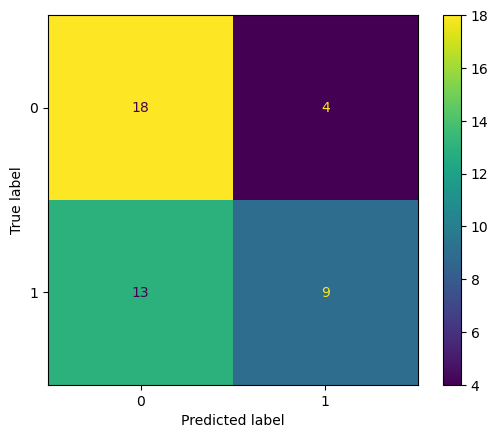

In [40]:
# Mostrando la matriz de confusión
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_nb)

<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
Prueba de Regresión Logística
</div>

In [43]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [45]:
# Haciendo las predicciones y muestrando las métricas igual que antes
y_pred_lr = lr_model.predict(X_test)

Accuracy Regresion Logistica: 0.6136363636363636
              precision    recall  f1-score   support

           0       0.58      0.82      0.68        22
           1       0.69      0.41      0.51        22

    accuracy                           0.61        44
   macro avg       0.64      0.61      0.60        44
weighted avg       0.64      0.61      0.60        44



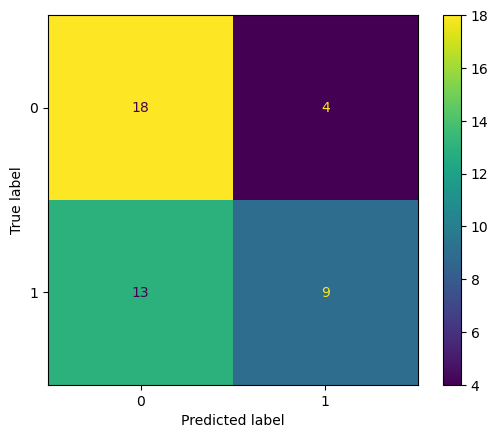

In [47]:
print("Accuracy Regresion Logistica:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr)

<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
Prueba de Árbol de Decisión
</div>

In [50]:
# Finalmente pruebando un modelo basado en arboles (Decision Tree)
# Entrenando el arbol con los mismos datos
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [52]:
# Prediciendo y mostrando las metricas
y_pred_tree = tree_model.predict(X_test)

Accuracy Árbol de Decisión: 0.45454545454545453
              precision    recall  f1-score   support

           0       0.45      0.41      0.43        22
           1       0.46      0.50      0.48        22

    accuracy                           0.45        44
   macro avg       0.45      0.45      0.45        44
weighted avg       0.45      0.45      0.45        44



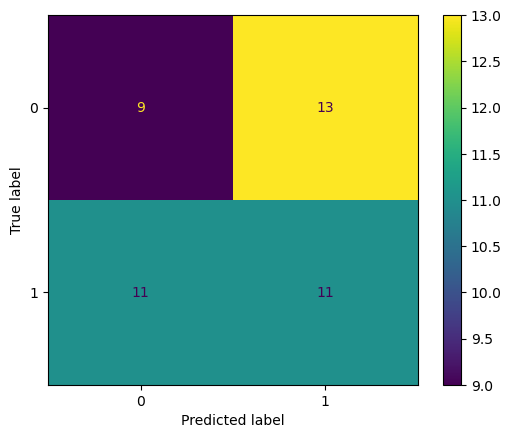

In [54]:
print("Accuracy Árbol de Decisión:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tree)

<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
Prueba de Maquinas de Clasificacion de Soporte de Vectores Lineales (LinearSVC)
</div>

In [57]:
lsvc = LinearSVC(dual = False)

In [59]:
lsvc.fit(X_train, y_train)

LinearSVC(dual=False)

In [61]:
y_pred_class=lsvc.predict(X_test)

Accuracy LinearSVC: 0.6363636363636364
              precision    recall  f1-score   support

           0       0.59      0.86      0.70        22
           1       0.75      0.41      0.53        22

    accuracy                           0.64        44
   macro avg       0.67      0.64      0.62        44
weighted avg       0.67      0.64      0.62        44



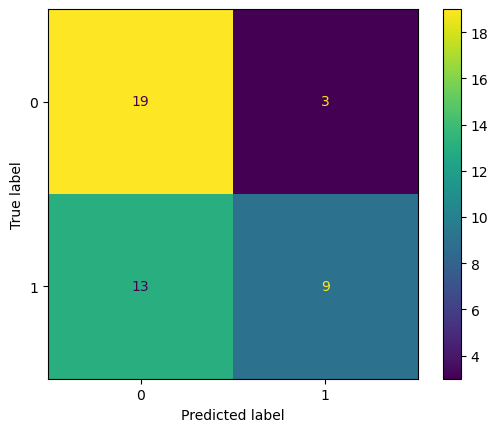

In [63]:
print("Accuracy LinearSVC:", accuracy_score(y_test, y_pred_class))
print(classification_report(y_test, y_pred_class))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_class)

<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
Prueba de Maquinas de Clasificacion de Bosque Aleatorio
</div>

In [66]:
# Finalmente pruebando un modelo basado en arboles (Decision Tree)
# Entrenando el arbol con los mismos datos
tree_model = RandomForestClassifier()
tree_model.fit(X_train, y_train)

RandomForestClassifier()

In [67]:
# Prediciendo y mostrando las metricas
y_pred_rand = tree_model.predict(X_test)

Accuracy Random F: 0.5681818181818182
              precision    recall  f1-score   support

           0       0.55      0.73      0.63        22
           1       0.60      0.41      0.49        22

    accuracy                           0.57        44
   macro avg       0.58      0.57      0.56        44
weighted avg       0.58      0.57      0.56        44



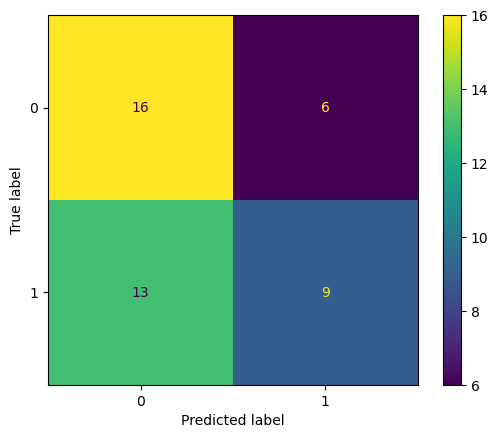

In [70]:
print("Accuracy Random F:", accuracy_score(y_test, y_pred_rand))
print(classification_report(y_test, y_pred_rand))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rand)

In [71]:
print("Resumen de Accuracies:")
print("Naive Bayes:        ", accuracy_score(y_test, y_pred_nb))
print("Regresión Logística:", accuracy_score(y_test, y_pred_lr))
print("Árbol de Decisión:  ", accuracy_score(y_test, y_pred_tree))
print("Linear Vector Machine:  ", accuracy_score(y_test, y_pred_class))
print("Random Forest Classifier:  ", accuracy_score(y_test, y_pred_rand))

Resumen de Accuracies:
Naive Bayes:         0.6136363636363636
Regresión Logística: 0.6136363636363636
Árbol de Decisión:   0.45454545454545453
Linear Vector Machine:   0.6363636363636364
Random Forest Classifier:   0.5681818181818182


<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
Validación cruzada basados en los modelos de Naive Bayes, Regresión Logística, Árbol de Decisión, Linear Vector Machine y Random Forest Classifier
</div>

In [75]:
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold

preamble = df_const_complete["Preamble"]
poder_eje = df_const_complete["nivel_poder_ejecutivo"]

vectorizador = TfidfVectorizer()
X = vectorizador.fit_transform(preamble)
y = poder_eje


In [77]:
# Definimos el esquema de validación cruzada estratificada con 10 folds
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=None)

In [79]:
# Obtenemos los puntajes de accuracy en cada fold

modelo_nb = MultinomialNB()

scores_nb = cross_val_score(modelo_nb, X, y, cv=skf, scoring='accuracy')

# Mostramos resultados
print("Naive Bayes Accuracy en cada fold:", scores_nb)
print("Naive Bayes Accuracy promedio: {:.4f}".format(scores_nb.mean()))

Naive Bayes Accuracy en cada fold: [0.8        0.53333333 0.73333333 0.53333333 0.78571429 0.85714286
 0.71428571 0.78571429 0.57142857 0.64285714]
Naive Bayes Accuracy promedio: 0.6957


In [81]:
# Modelo 2: Regresión Logística
# Ahora evaluamos el modelo de regresión logística con el mismo esquema de validación cruzada.

modelo_lr = LogisticRegression(max_iter=1000)

scores_lr = cross_val_score(modelo_lr, X, y, cv=skf, scoring='accuracy')

print("Regresión Logística Accuracy en cada fold:", scores_lr)
print("Regresión Logística Accuracy promedio: {:.4f}".format(scores_lr.mean()))

Regresión Logística Accuracy en cada fold: [0.4        0.6        0.8        0.86666667 0.64285714 0.57142857
 0.71428571 0.5        0.64285714 0.64285714]
Regresión Logística Accuracy promedio: 0.6381


In [83]:
# Modelo 3: Árbol de Decisión
# Finalmente evaluamos el modelo de árbol de decisión usando validación cruzada.

modelo_dt = DecisionTreeClassifier()

scores_dt = cross_val_score(modelo_dt, X, y, cv=skf, scoring='accuracy')

print("Árbol de Decisión Accuracy en cada fold:", scores_dt)
print("Árbol de Decisión Accuracy promedio: {:.4f}".format(scores_dt.mean()))

Árbol de Decisión Accuracy en cada fold: [0.66666667 0.46666667 0.8        0.33333333 0.5        0.42857143
 0.5        0.5        0.57142857 0.57142857]
Árbol de Decisión Accuracy promedio: 0.5338


In [84]:
# Modelo 4: Árbol de Decisión
# Finalmente evaluamos el modelo de árbol de decisión usando validación cruzada.
# Maquinas de Clasificacion de Soporte de Vectores Lineales (LinearSVC)


lsvc_dt = LinearSVC(dual = False)

scores_dt = cross_val_score(lsvc_dt, X, y, cv=skf, scoring='accuracy')

print("Linear Vector Machine Accuracy en cada fold:", scores_dt)
print("Linear Vector Machine Accuracy promedio: {:.4f}".format(scores_dt.mean()))

Linear Vector Machine Accuracy en cada fold: [0.86666667 0.66666667 0.53333333 0.53333333 0.71428571 0.78571429
 0.5        0.78571429 0.57142857 0.78571429]
Linear Vector Machine Accuracy promedio: 0.6743


In [87]:
# Modelo 5: Bosque Aleatorio
# Finalmente evaluamos el modelo de árbol de decisión usando validación cruzada.

modelo_rf = RandomForestClassifier()

scores_rf = cross_val_score(modelo_rf, X, y, cv=skf, scoring='accuracy')

print("Random Forest Classifier Accuracy en cada fold:", scores_rf)
print("Random Forest Classifier Accuracy promedio: {:.4f}".format(scores_rf.mean()))

Random Forest Classifier Accuracy en cada fold: [0.73333333 0.6        0.73333333 0.6        0.85714286 0.78571429
 0.5        0.64285714 0.78571429 0.64285714]
Random Forest Classifier Accuracy promedio: 0.6881


<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
Creando un dataframe manual de entrenamiento/prueba (en vivo):

50:50 cuyos niveles de poder ejecutivo son 1 y 0 para entrenamiento.

5:5 cuyos niveles de poder ejecutivo son 1 y 0 para probar.

</div>

In [89]:
# Paso 1: separar por clase
df_0 = df_const[df_const["nivel_poder_ejecutivo"] == 0]
df_1 = df_const[df_const["nivel_poder_ejecutivo"] == 1]

# Paso 2: seleccionar primeros 50 de cada clase para entrenamiento
df_0_train = df_0.iloc[:50]
df_1_train = df_1.iloc[:50]

# Paso 3: seleccionar últimos 5 de cada clase para probar
df_0_test = df_0.tail(5)
df_1_test = df_1.tail(5)

# Paso 4: crear DataFrames de entrenamiento y prueba
df_train = pd.concat([df_0_train, df_1_train])
df_test = pd.concat([df_0_test, df_1_test])

# Paso 5: unir en un solo DataFrame 
df_prueba = pd.concat([df_train, df_test]).reset_index(drop=True)

In [90]:
#df_prueba = pd.concat([df_const_complete, df_const_prueba_complete])

preamble = df_prueba["Preamble"]
poder = df_prueba["nivel_poder_ejecutivo"]

vectorizador = TfidfVectorizer()
X = vectorizador.fit_transform(preamble)
y = poder


#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.0909, stratify=y)

split_index = int(0.9091 * X.shape[0])
X_train = X[:split_index]
X_test = X[split_index:]

y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]

In [91]:
X_train

<100x4650 sparse matrix of type '<class 'numpy.float64'>'
	with 14790 stored elements in Compressed Sparse Row format>

In [92]:
X_test

<10x4650 sparse matrix of type '<class 'numpy.float64'>'
	with 1123 stored elements in Compressed Sparse Row format>

<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
Prueba del modelo de Naive Bayes (en vivo)
</div>

In [99]:
# Entrenando el modelo Naive Bayes que es uno de los más usados para clasificación de texto
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [101]:
# Haciendo predicciones con los datos de prueba
y_pred_nb = nb_model.predict(X_test)

In [103]:
# Imprimiendo el accuracy y otras métricas importantes como precision, recall y f1-score
print("Accuracy Naive Bayes:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Accuracy Naive Bayes: 0.8
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.60      0.75         5

    accuracy                           0.80        10
   macro avg       0.86      0.80      0.79        10
weighted avg       0.86      0.80      0.79        10



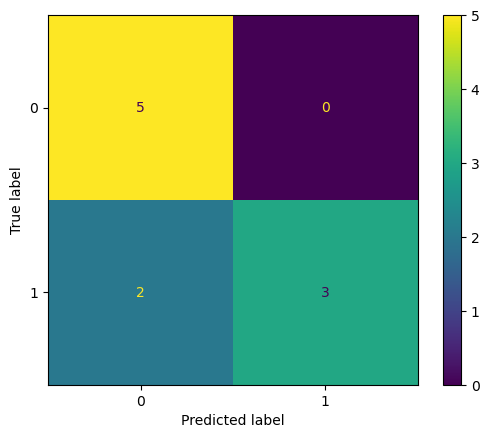

In [105]:
# Mostrando la matriz de confusión
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_nb)

<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
Prueba de Regresión Logística (en vivo)
</div>

In [108]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [110]:
# Haciendo las predicciones y muestrando las métricas igual que antes
y_pred_lr = lr_model.predict(X_test)

Accuracy Regresión Logística: 0.8
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.60      0.75         5

    accuracy                           0.80        10
   macro avg       0.86      0.80      0.79        10
weighted avg       0.86      0.80      0.79        10



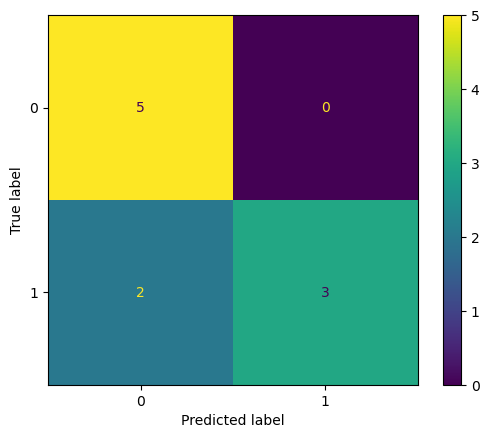

In [112]:
print("Accuracy Regresión Logística:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr)

<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
Prueba de Árbol de Decisión (en vivo)
</div>

In [115]:
# Finalmente pruebando un modelo basado en arboles (Decision Tree)
# Entrenando el arbol con los mismos datos
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [117]:
# Prediciendo y mostrando las metricas
y_pred_tree = tree_model.predict(X_test)

Accuracy Árbol de Decisión: 0.5
              precision    recall  f1-score   support

           0       0.50      0.60      0.55         5
           1       0.50      0.40      0.44         5

    accuracy                           0.50        10
   macro avg       0.50      0.50      0.49        10
weighted avg       0.50      0.50      0.49        10



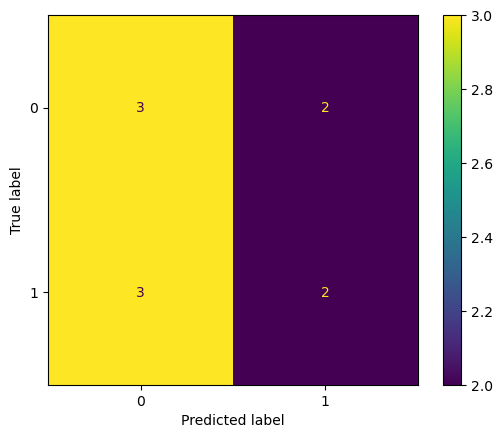

In [119]:
print("Accuracy Árbol de Decisión:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tree)

<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
Prueba de Maquinas de Clasificacion de Soporte de Vectores Lineales (LinearSVC) (en vivo)
</div>

In [122]:
lsvc = LinearSVC(dual = False)

In [124]:
lsvc.fit(X_train, y_train)

LinearSVC(dual=False)

In [126]:
y_pred_class=lsvc.predict(X_test)

Accuracy LinearSVC: 0.8
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.60      0.75         5

    accuracy                           0.80        10
   macro avg       0.86      0.80      0.79        10
weighted avg       0.86      0.80      0.79        10



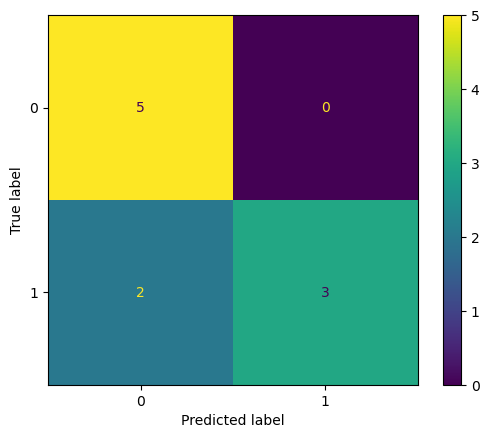

In [128]:
print("Accuracy LinearSVC:", accuracy_score(y_test, y_pred_class))
print(classification_report(y_test, y_pred_class))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_class)

<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
Prueba de Maquinas de Clasificacion de Bosque Aleatorio
</div>

In [131]:
# Finalmente pruebando un modelo basado en arboles (Decision Tree)
# Entrenando el arbol con los mismos datos
tree_model = RandomForestClassifier()
tree_model.fit(X_train, y_train)

RandomForestClassifier()

In [132]:
# Prediciendo y mostrando las metricas
y_pred_rand = tree_model.predict(X_test)

Accuracy Random F: 0.7
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       1.00      0.40      0.57         5

    accuracy                           0.70        10
   macro avg       0.81      0.70      0.67        10
weighted avg       0.81      0.70      0.67        10



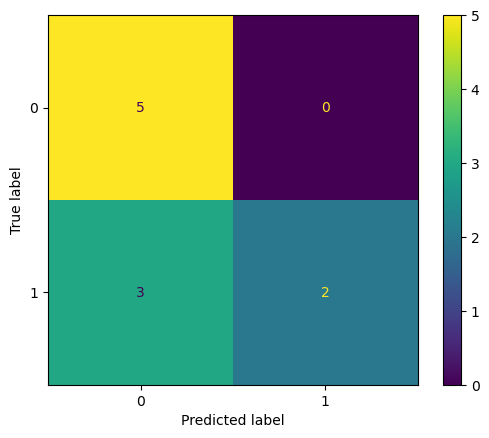

In [135]:
print("Accuracy Random F:", accuracy_score(y_test, y_pred_rand))
print(classification_report(y_test, y_pred_rand))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rand)

In [136]:
print("Resumen de Accuracies:")
print("Naive Bayes:        ", accuracy_score(y_test, y_pred_nb))
print("Regresión Logística:", accuracy_score(y_test, y_pred_lr))
print("Árbol de Decisión:  ", accuracy_score(y_test, y_pred_tree))
print("Linear Vector Machine:  ", accuracy_score(y_test, y_pred_class))
print("Random Forest Classifier:  ", accuracy_score(y_test, y_pred_rand))

Resumen de Accuracies:
Naive Bayes:         0.8
Regresión Logística: 0.8
Árbol de Decisión:   0.5
Linear Vector Machine:   0.8
Random Forest Classifier:   0.7


<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
Validación cruzada basados en los modelos de Naive Bayes, Regresión Logística, Árbol de Decisión, Linear Vector Machine y Random Forest Classifier
</div>

In [140]:
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold

preamble = df_prueba["Preamble"]
poder_eje = df_prueba["nivel_poder_ejecutivo"]

vectorizador = TfidfVectorizer()
X = vectorizador.fit_transform(preamble)
y = poder_eje


In [142]:
# Definimos el esquema de validación cruzada estratificada con 5 folds
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=None)

In [144]:
# Obtenemos los puntajes de accuracy en cada fold

modelo_nb = MultinomialNB()

scores_nb = cross_val_score(modelo_nb, X, y, cv=skf, scoring='accuracy')

# Mostramos resultados
print("Naive Bayes Accuracy en cada fold:", scores_nb)
print("Naive Bayes Accuracy promedio: {:.4f}".format(scores_nb.mean()))

Naive Bayes Accuracy en cada fold: [0.72727273 0.63636364 0.54545455 0.90909091 0.54545455 0.81818182
 0.63636364 1.         0.54545455 0.63636364]
Naive Bayes Accuracy promedio: 0.7000


In [146]:
# Modelo 2: Regresión Logística
# Ahora evaluamos el modelo de regresión logística con el mismo esquema de validación cruzada.

modelo_lr = LogisticRegression(max_iter=1000)

scores_lr = cross_val_score(modelo_lr, X, y, cv=skf, scoring='accuracy')

print("Regresión Logística Accuracy en cada fold:", scores_lr)
print("Regresión Logística Accuracy promedio: {:.4f}".format(scores_lr.mean()))

Regresión Logística Accuracy en cada fold: [0.81818182 0.63636364 0.45454545 0.63636364 0.36363636 0.54545455
 0.54545455 0.72727273 0.63636364 0.54545455]
Regresión Logística Accuracy promedio: 0.5909


In [148]:
# Modelo 3: Árbol de Decisión
# Finalmente evaluamos el modelo de árbol de decisión usando validación cruzada.

modelo_dt = DecisionTreeClassifier()

scores_dt = cross_val_score(modelo_dt, X, y, cv=skf, scoring='accuracy')

print("Árbol de Decisión Accuracy en cada fold:", scores_dt)
print("Árbol de Decisión Accuracy promedio: {:.4f}".format(scores_dt.mean()))

Árbol de Decisión Accuracy en cada fold: [0.54545455 0.72727273 0.45454545 0.90909091 0.72727273 0.72727273
 0.63636364 0.72727273 0.45454545 0.54545455]
Árbol de Decisión Accuracy promedio: 0.6455


In [149]:
# Modelo 4: Árbol de Decisión
# Finalmente evaluamos el modelo de árbol de decisión usando validación cruzada.
# Maquinas de Clasificacion de Soporte de Vectores Lineales (LinearSVC)


lsvc_dt = LinearSVC(dual = False)

scores_dt = cross_val_score(lsvc_dt, X, y, cv=skf, scoring='accuracy')

print("Linear Vector Machine Accuracy en cada fold:", scores_dt)
print("Linear Vector Machine Accuracy promedio: {:.4f}".format(scores_dt.mean()))

Linear Vector Machine Accuracy en cada fold: [0.72727273 0.72727273 0.72727273 0.72727273 0.72727273 0.63636364
 0.90909091 0.54545455 0.72727273 0.36363636]
Linear Vector Machine Accuracy promedio: 0.6818


In [150]:
# Modelo 3: Bosque Aleatorio
# Finalmente evaluamos el modelo de árbol de decisión usando validación cruzada.

modelo_rf = RandomForestClassifier()

scores_rf = cross_val_score(modelo_rf, X, y, cv=skf, scoring='accuracy')

print("Random Forest Classifier Accuracy en cada fold:", scores_rf)
print("Random Forest Classifier Accuracy promedio: {:.4f}".format(scores_rf.mean()))

Random Forest Classifier Accuracy en cada fold: [0.90909091 0.72727273 0.45454545 0.54545455 0.72727273 0.72727273
 0.72727273 0.63636364 0.72727273 0.63636364]
Random Forest Classifier Accuracy promedio: 0.6818
